In [84]:
import os.path as op

from neural_priors.utils.data import Subject, get_all_subject_ids

subject = '02'
session = None
bids_folder = '/data/ds-neuralpriors'
smoothed = False
from nilearn import image

from nilearn.glm.first_level import make_first_level_design_matrix
import pandas as pd
import numpy as np
import os

In [85]:
sub = Subject(subject, bids_folder=bids_folder)
behavior = sub.get_behavioral_data(session=session, tasks=['estimation_task', ])

In [88]:
'f-{a}'.format(a=1, b=2)

'f-1'

In [86]:
behavior

trial_nr       onset  phase  \
session subject task            run                                    
1       02      estimation_task 1   21          1   78.766309      5   
                                    32          2   89.342760      5   
                                    44          3  100.436326      5   
                                    55          4  110.228728      5   
                                    66          5  119.353815      5   
...                                           ...         ...    ...   
2       02      estimation_task 8   300        26  286.476922      5   
                                    311        27  296.169204      5   
                                    323        28  306.678937      5   
                                    334        29  316.321221      5   
                                    346        30  327.314718      5   

                                         response  nr_frames     n  jitter  \
session subject task            run                                          
1       02      estimation_task 1   21       30.0       30.0  23.0     6.0   
                                    32       16.0       31.0  13.0     6.0   
                                    44       28.0       30.0  22.0     6.0   
                                    55       37.0       30.0  40.0     5.0   
                                    66        NaN       29.0  30.0     4.0   
...                                           ...        ...   ...     ...   
2       02      estimation_task 8   300      30.0       30.0  31.0     6.0   
                                    311      26.0       31.0  20.0     5.0   
                                    323      37.0       30.0  39.0     6.0   
                                    334      28.0       30.0  23.0     5.0   
                                    346      22.0       30.0  16.0     6.0   

                                         start_marker_position  response_time  \
session subject task            run                                             
1       02      estimation_task 1   21                    13.0       0.347014   
                                    32                    28.0       1.731693   
                                    44                    28.0       1.334556   
                                    55                    15.0       1.935211   
                                    66                    31.0            NaN   
...                                                        ...            ...   
2       02      estimation_task 8   300                   12.0       0.849993   
                                    311                   11.0       1.351833   
                                    323                   16.0       0.380311   
                                    334                   29.0       0.827205   
                                    346                   28.0       0.333742   

                                          onset_abs  duration range  error  \
session subject task            run                                          
1       02      estimation_task 1   21    82.993713  0.500480  wide    7.0   
                                    32    93.570164  0.517155  wide    3.0   
                                    44   104.663730  0.500419  wide    6.0   
                                    55   114.456132  0.500508  wide   -3.0   
                                    66   123.581219  0.483739  wide    NaN   
...                                             ...       ...   ...    ...   
2       02      estimation_task 8   300  289.536953  0.500450  wide   -1.0   
                                    311  299.229235  0.517070  wide    6.0   
                                    323  309.738968  0.500413  wide   -2.0   
                                    334  319.381252  0.500344  wide    5.0   
                                    346  330.374749  0.500359  wide    6.0   

                    

In [83]:
for subject_id in get_all_subject_ids():
    sub = Subject(subject_id, bids_folder=bids_folder)

    for session in sub.get_sessions():
        print(f"Processing {sub.subject_id}, session {session}")
        try:
            print(sub.get_single_trial_estimates(session, 'response', False).shape)
        except:
            print("Error")

Processing 01, session 1
(59, 70, 51, 240)
Processing 01, session 2
Error
Processing 02, session 1
Error
Processing 02, session 2
Error
Processing 03, session 1
(59, 69, 47, 240)
Processing 04, session 1
(60, 69, 50, 240)
Processing 05, session 1
(57, 68, 50, 240)
Processing 06, session 1
(59, 74, 51, 240)
Processing 07, session 1
(60, 73, 53, 239)
Processing 08, session 1
(58, 72, 49, 240)
Processing 09, session 1
Error
Processing 10, session 1
Error


In [79]:
sub.get_single_trial_estimates(1, 'response', smoothed=True).shape

(61, 73, 51, 240)

In [73]:
sub = Subject(subject, bids_folder=bids_folder)
sub.get_onsets(2).loc[5]

,onset,n,trial_type,response
trial_nr,,,,
121,7.506955,21.0,stimulus,NaN
121,12.094569,NaN,response,19.0
122,16.214981,14.0,stimulus,NaN
122,20.819238,NaN,response,16.0
123,24.939787,35.0,stimulus,NaN
123,29.544054,NaN,response,35.0
124,33.664530,20.0,stimulus,NaN
124,38.268849,NaN,response,22.0
125,42.389218,32.0,stimulus,NaN


In [60]:
session = None if session == 0 else session

derivatives = op.join(bids_folder, 'derivatives')

sub = Subject(subject, bids_folder=bids_folder)

runs = sub.get_runs(session)
ims = sub.get_preprocessed_bold(session=session)

base_dir = 'glm_stim1.denoise'

if smoothed:
    base_dir += '.smoothed'
    ims = [image.smooth_img(im, fwhm=5.0) for im in ims]


data = [image.load_img(im).get_fdata() for im in ims]

onsets = sub.get_onsets(session)
onsets['trial_type'] = onsets.apply(lambda row: f'stimulus_{row["n"]}' if row['trial_type'] == 'stimulus' else f'response_{row.response}', axis=1)
onsets['duration'] = 0.0

tr = 2.3
n = 137
frametimes = np.linspace(tr/2., (n - .5)*tr, n)
onsets['onset'] = ((onsets['onset']+tr/2.) // 2.3) * 2.3

if session is None:
    base_dir = op.join(derivatives, base_dir, f'sub-{subject}',
                    'func')
else:
    base_dir = op.join(derivatives, base_dir, f'sub-{subject}',
                    f'ses-{session}', 'func')

    onsets = pd.concat([onsets], keys=[session], names=['session'])

if not op.exists(base_dir):
    os.makedirs(base_dir)

dm = onsets[['onset', 'trial_type', 'duration']].groupby(['session', 'run']).apply(lambda d: make_first_level_design_matrix(frametimes, d, hrf_model='fir', drift_model=None, drift_order=0).drop('constant', axis=1)).fillna(0.0)    # dm = [make_first_level_design_matrix(frametimes, on, hrf_model='fir', oversampling=100.,
#                                      drift_order=0,
#                                      drift_model=None).drop('constant', axis=1) for (session, run), on in onsets.groupby(['session', 'run'])]

# dm = pd.concat(dm, keys=[(session, run) for (session, run), names=['run']).fillna(0)
dm.columns = [c.replace('_delay_0', '') for c in dm.columns]
dm /= dm.max()
# dm = np.round(dm)
dm = dm>0.1
print(dm)
print(dm.shape)

X = [d.values for (session, run), d in dm.groupby(['session', 'run'])]
print(X)

for x in X:
    print(x.shape)

# create a directory for saving GLMsingle outputs


/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x10688a830> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  COLUMN_DEFINING_EVENT_IDENTITY, sort=False).agg(STRATEGY).reset_index()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x10688a830> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  COLUMN_DEFINING_EVENT_IDENTITY, sort=False).agg(STRATEGY).reset_index()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 

                    response_100  response_160  response_170  response_180  \
session run                                                                  
1       1   1.15           False         False         False         False   
            3.45           False         False         False         False   
            5.75           False         False         False         False   
            8.05           False         False         False         False   
            10.35          False         False         False         False   
...                          ...           ...           ...           ...   
2       8   304.75         False         False         False         False   
            307.05         False         False         False         False   
            309.35         False         False         False         False   
            311.65         False         False         False         False   
            313.95         False         False         False    

In [71]:
onsets.iloc[:10]

onset     n     trial_type  response  duration
session run trial_nr                                                
1       1   1           6.9  23.0  stimulus_23.0       NaN       0.0
            1          13.8   NaN  response_30.0      30.0       0.0
            2          18.4  13.0  stimulus_13.0       NaN       0.0
            2          25.3   NaN  response_16.0      16.0       0.0
            3          29.9  22.0  stimulus_22.0       NaN       0.0
            3          34.5   NaN  response_28.0      28.0       0.0
            4          39.1  40.0  stimulus_40.0       NaN       0.0
            4          46.0   NaN  response_37.0      37.0       0.0
            5          48.3  30.0  stimulus_30.0       NaN       0.0
            5          52.9   NaN   response_nan       NaN       0.0

In [69]:
onsets[onsets['trial_type'] == 'response_nan']

onset   n    trial_type  response  duration
session run trial_nr                                             
1       1   5          52.9 NaN  response_nan       NaN       0.0
        6   173       227.7 NaN  response_nan       NaN       0.0
        8   235       243.8 NaN  response_nan       NaN       0.0
2       8   229       186.3 NaN  response_nan       NaN       0.0

In [65]:
tmp = onsets.trial_type.unique()
tmp.sort()
tmp

array(['response_10.0', 'response_11.0', 'response_12.0', 'response_13.0',
       'response_14.0', 'response_15.0', 'response_16.0', 'response_17.0',
       'response_18.0', 'response_19.0', 'response_20.0', 'response_21.0',
       'response_22.0', 'response_23.0', 'response_24.0', 'response_25.0',
       'response_26.0', 'response_27.0', 'response_28.0', 'response_29.0',
       'response_30.0', 'response_31.0', 'response_32.0', 'response_33.0',
       'response_34.0', 'response_35.0', 'response_36.0', 'response_37.0',
       'response_38.0', 'response_39.0', 'response_40.0', 'response_nan',
       'stimulus_10.0', 'stimulus_11.0', 'stimulus_12.0', 'stimulus_13.0',
       'stimulus_14.0', 'stimulus_15.0', 'stimulus_16.0', 'stimulus_17.0',
       'stimulus_18.0', 'stimulus_19.0', 'stimulus_20.0', 'stimulus_21.0',
       'stimulus_22.0', 'stimulus_23.0', 'stimulus_24.0', 'stimulus_25.0',
       'stimulus_26.0', 'stimulus_27.0', 'stimulus_28.0', 'stimulus_29.0',
       'stimulus_30.0', 's

In [42]:
dm = onsets[['onset', 'trial_type', 'duration']].groupby(['session', 'run']).apply(lambda d: make_first_level_design_matrix(frametimes, d, hrf_model='fir', drift_model=None, drift_order=0).drop('constant', axis=1)).fillna(0.0)    # dm = [make_first_level_design_matrix(frametimes, on, hrf_model='fir', oversampling=100.,
#                                      drift_order=0,
#                                      drift_model=None).drop('constant', axis=1) for (session, run), on in onsets.groupby(['session', 'run'])]

/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x10688a830> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  COLUMN_DEFINING_EVENT_IDENTITY, sort=False).agg(STRATEGY).reset_index()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x10688a830> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  COLUMN_DEFINING_EVENT_IDENTITY, sort=False).agg(STRATEGY).reset_index()
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 

In [57]:
onsets.loc[(2, 2)]

,onset,n,trial_type,response,duration
trial_nr,,,,,
30,-46.0,NaN,response_nan,NaN,0.0
31,6.9,17.0,stimulus_17.0,NaN,0.0
31,11.5,NaN,response_19.0,19.0,0.0
32,16.1,13.0,stimulus_13.0,NaN,0.0
32,20.7,NaN,response_15.0,15.0,0.0
33,25.3,16.0,stimulus_16.0,NaN,0.0
33,32.2,NaN,response_19.0,19.0,0.0
34,36.8,24.0,stimulus_24.0,NaN,0.0
34,41.4,NaN,response_24.0,24.0,0.0


In [52]:
dm.loc[(2, 2)]

,response_100,response_160,response_170,response_180,response_200,response_240,response_250,response_270,response_280,response_290,...,stimulus_110,stimulus_270,stimulus_310,response_190,stimulus_350,stimulus_360,response_150,response_390,response_400,response_110
1.15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3.45,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5.75,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8.05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10.35,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304.75,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307.05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
309.35,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
311.65,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
dm.groupby(['session', 'run'])

In [41]:
dm.groupby(['session', 'run']).sum().sum(1)

session  run
1        1      60.0
         2      60.0
         3      60.0
         4      60.0
         5      60.0
         6      60.0
         7      60.0
         8      60.0
2        1      60.0
         2      59.0
         3      60.0
         4      60.0
         5      60.0
         6      60.0
         7      60.0
         8      60.0
dtype: float64

In [13]:
onsets['onset'].max()

294.4

In [10]:
onsets.groupby(['session', 'run']).size()

session  run
1        1      60
         2      60
         3      60
         4      60
         5      60
         6      60
         7      60
         8      60
2        1      60
         2      60
         3      60
         4      60
         5      60
         6      60
         7      60
         8      60
dtype: int64

In [31]:
dm

response_100  response_160  response_170  response_180  \
session run                                                                  
1       1   1.15             0.0           0.0           0.0           0.0   
            3.45             0.0           0.0           0.0           0.0   
            5.75             0.0           0.0           0.0           0.0   
            8.05             0.0           0.0           0.0           0.0   
            10.35            0.0           0.0           0.0           0.0   
...                          ...           ...           ...           ...   
2       8   304.75           0.0           0.0           0.0           0.0   
            307.05           0.0           0.0           0.0           0.0   
            309.35           0.0           0.0           0.0           0.0   
            311.65           0.0           0.0           0.0           0.0   
            313.95           0.0           0.0           0.0           0.0   

                    response_200  response_240  response_250  response_270  \
session run                                                                  
1       1   1.15             0.0           0.0           0.0           0.0   
            3.45             0.0           0.0           0.0           0.0   
            5.75             0.0           0.0           0.0           0.0   
            8.05             0.0           0.0           0.0           0.0   
            10.35            0.0           0.0           0.0           0.0   
...                          ...           ...           ...           ...   
2       8   304.75           0.0           0.0           0.0           0.0   
            307.05           0.0           0.0           0.0           0.0   
            309.35           0.0           0.0           0.0           0.0   
            311.65           0.0           0.0           0.0           0.0   
            313.95           0.0           0.0           0.0           0.0   

                    response_280  response_290  ...  stimulus_110  \
session run                                     ...                 
1       1   1.15             0.0           0.0  ...           0.0   
            3.45             0.0           0.0  ...           0.0   
            5.75             0.0           0.0  ...           0.0   
            8.05             0.0           0.0  ...           0.0   
            10.35            0.0           0.0  ...           0.0   
...                          ...           ...  ...           ...   
2       8   304.75           0.0           0.0  ...           0.0   
            307.05           0.0           0.0  ...           0.0   
            309.35           0.0           0.0  ...           0.0   
            311.65           0.0           0.0  ...           0.0   
            313.95           0.0           0.0  ...           0.0   

                    stimulus_270  stimulus_310  response_190  stimulus_350  \
session run                                                                  
1       1   1.15             0.0           0.0           0.0           0.0   
            3.45             0.0           0.0           0.0           0.0   
            5.75             0.0           0.0           0.0           0.0   
            8.05             0.0           0.0           0.0           0.0   
            10.35            0.0           0.0           0.0           0.0   
...                          ...           ...           ...           ...   
2       8   304.75           0.0           0.0           0.0           0.0   
            307.05           0.0           0.0           0.0           0.0   
            309.35           0.0           0.0           0.0           0.0   
            311.65           0.0           0.0           0.0           0.0   
            313.95           0.0           0.0           0.0           0.0   

                    stimulus_360  response_150  response_390  response_400  \

In [34]:
dm.groupby(['run', 'session']).apply(lambda d: d..unique()))

SyntaxError: unmatched ')' (2967215733.py, line 1)

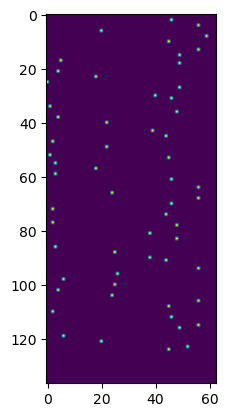

In [28]:
import matplotlib.pyplot as plt
plt.imshow(dm.loc[(2, 2)])

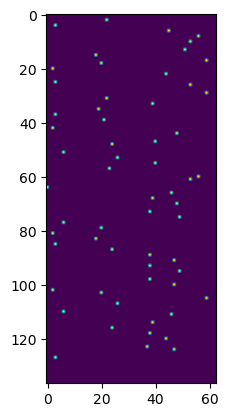

In [29]:
import matplotlib.pyplot as plt
plt.imshow(dm.loc[(2, 3)])

In [21]:
dm.groupby(['session', 'run']).sum().sum(1)

session  run
1        1      60.0
         2      60.0
         3      60.0
         4      60.0
         5      60.0
         6      60.0
         7      60.0
         8      60.0
2        1      60.0
         2      59.0
         3      60.0
         4      60.0
         5      60.0
         6      60.0
         7      60.0
         8      60.0
dtype: float64

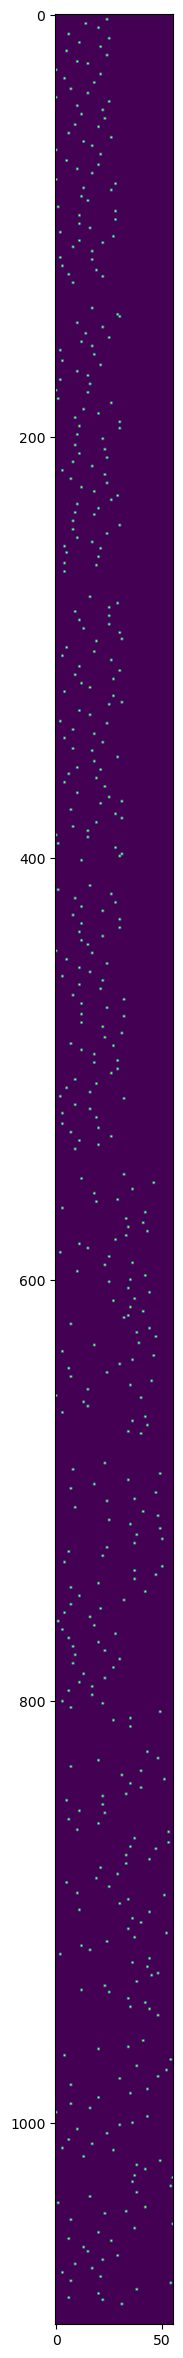

In [6]:
plt.imshow(dm)

plt.gcf().set_size_inches(20, 30)

In [45]:
pd.DataFrame(X[3])

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
import matplotlib.pyplot as plt
plt.imshow(X[4])

plt.gcf().set_size_inches(20, 30)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_20312/2931340527.py", line 2, in <module>
    plt.imshow(X[4])
NameError: name 'X' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1012, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/Us

In [37]:
np.digitize?

Signature:       np.digitize(x, bins, right=False)
Call signature:  np.digitize(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function digitize at 0x1044cb7f0>
File:            ~/mambaforge/lib/python3.10/site-packages/numpy/lib/function_base.py
Docstring:      
Return the indices of the bins to which each value in input array belongs.

=========  =============  ============================
`right`    order of bins  returned index `i` satisfies
=========  =============  ============================
``False``  increasing     ``bins[i-1] <= x < bins[i]``
``True``   increasing     ``bins[i-1] < x <= bins[i]``
``False``  decreasing     ``bins[i-1] > x >= bins[i]``
``True``   decreasing     ``bins[i-1] >= x > bins[i]``
=========  =============  ============================

If values in `x` are beyond the bounds of `bins`, 0 or ``len(bins)`` is
returned as appropriate.

Parameters
----------
x : array_like
    Input array to be binned. Prior to NumPy 1.10.0, t

In [42]:
# make sure dm contains only 0s and 1s
dm = dm.applymap(lambda x: 1 if x > 0 else 0)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77570/193644446.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dm = dm.applymap(lambda x: 1 if x > 0 else 0)


In [40]:
np.digitize(dm, [-1, 0, 1])

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [28]:
onsets

onset     n     trial_type  response  duration
run trial_nr                                                
1   1           6.9  20.0  stimulus_20.0       NaN       0.0
    1          11.5   NaN   response_nan       NaN       0.0
    2          16.1  15.0  stimulus_15.0       NaN       0.0
    2          23.0   NaN  response_17.0      17.0       0.0
    3          27.6  22.0  stimulus_22.0       NaN       0.0
...             ...   ...            ...       ...       ...
8   238       278.3   NaN  response_32.0      32.0       0.0
    239       282.9  15.0  stimulus_15.0       NaN       0.0
    239       287.5   NaN  response_17.0      17.0       0.0
    240       289.8  17.0  stimulus_17.0       NaN       0.0
    240       294.4   NaN  response_24.0      24.0       0.0

[480 rows x 5 columns]